1. Code for class (modified Zurich class)  (A,B,C,D,E,F,H)                         наименований
2. Code for largest spot size              (X,R,S,A,H,K)                           наименований
3. Code for spot distribution              (X,O,I,C)                               наименований
4. Activity                                (1 = reduced, 2 = unchanged)            порядковая
5. Evolution                               (1 = decay, 2 = no growth,              порядковая
                                               3 = growth)
6. Previous 24 hour flare activity code    (1 = nothing as big as an M1,           порядковая
                                               2 = one M1,
                                               3 = more activity than one M1)
7. Historically-complex                    (1 = Yes, 2 = No)                       бинарные
8. Did region become historically complex  (1 = yes, 2 = no)                       бинарные
      on this pass across the sun's disk
9. Area                                    (1 = small, 2 = large)                  порядковая
10. Area of the largest spot                (1 = <=5, 2 = >5)                      порядковая

From all these predictors three classes of flares are predicted, which are 
 represented in the last three columns.

11. C-class flares production by this region    Number                             абсолютная
      in the following 24 hours (common flares)
12. M-class flares production by this region    Number                             абсолютная
      in the following 24 hours (moderate flares)
13. X-class flares production by this region    Number                             абсолютная
      in the following 24 hours (severe flares)

In [1]:
import pandas as pd

file_path = 'flare1_100.xlsx'

df = pd.read_excel(file_path)

df.info()
print(df.shape[0])
print(df.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  100 non-null    int64 
 1   1           100 non-null    object
 2   2           100 non-null    object
 3   3           100 non-null    object
 4   4           100 non-null    int64 
 5   5           100 non-null    int64 
 6   6           100 non-null    int64 
 7   7           100 non-null    int64 
 8   8           100 non-null    int64 
 9   9           100 non-null    int64 
 10  10          100 non-null    int64 
 11  11          100 non-null    int64 
 12  12          100 non-null    int64 
 13  13          100 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 11.1+ KB
100
14


In [2]:
matrix_df = df.values.T

numeric_df = [4, 5, 6, 9, 10]
categorical_df = [1, 2, 3]
absolute_df = [11, 12, 13]
binare_df = [7, 8]

exeception_df = ['Unnamed: 0']



In [3]:
num_rows_df = df.shape[0]
print(f"Количество строк датасета: {num_rows_df}")

num_columns_df = df.shape[1]
print(f"Количество столбцов датасета: {num_columns_df}")

num_columns_numeric_df = len(numeric_df)
print(f"Данные с шкалой порядка (количество столбцов: {num_columns_numeric_df})")
print(numeric_df)

num_columns_categorical_df = len(categorical_df)
print(f"\nДанные с шкалой наименований (количество столбцов: {num_columns_categorical_df})")
print(categorical_df)

num_columns_absolute_df = len(absolute_df)
print(f"\nДанные с абсолютной шкалой (количество столбцов: {num_columns_absolute_df})") 
print(absolute_df)

num_columns_binare_df = len(binare_df)
print(f"\nДанные с бинарной шкалой (количество столбцов: {num_columns_binare_df})") 
print(binare_df)


Количество строк датасета: 100
Количество столбцов датасета: 14
Данные с шкалой порядка (количество столбцов: 5)
[4, 5, 6, 9, 10]

Данные с шкалой наименований (количество столбцов: 3)
[1, 2, 3]

Данные с абсолютной шкалой (количество столбцов: 3)
[11, 12, 13]

Данные с бинарной шкалой (количество столбцов: 2)
[7, 8]


In [4]:
import pandas as pd
import numpy as np
import math

matrix_pairwise_distances_df = np.zeros((num_rows_df, num_rows_df), dtype=np.float64)

def calc_categorical(i, l , column):
    d = np.float64(0)
    xi = column[i]
    xl = column[l]

    for x in column:
        if(((xi == x) and (xl == x)) or ((xi != x) and (xl != x))):
            d += 0
        else:
            d += 1

    d = d / np.float64(num_rows_df)  
    return d

def calc_numeric(i, l , column):
    d = np.float64(0)
    xi = column[i]
    xl = column[l]

    for x in column:
        if(((xi > x) and (xl > x)) or ((xi < x) and (xl < x)) or ((xi == x) and (xl == x))):
            d += 0
        elif(((xi > x) and (xl < x)) or ((xi < x) and (xl > x))):
            d += 1
        else:
            d += 0.5

    d = d / np.float64(num_rows_df)  
    return d

def calc_absolute(i, l , column):
    d = np.float64(0)
    xi = column[i]
    xl = column[l]

    d = abs(xi - xl) / (np.float64(max(column)) - np.float64(min(column)))  
    return d

for i in range(0, num_rows_df - 1):
    for l in range(i + 1, num_rows_df):
        t = 0
        d = np.float64(0)

        for column in df.columns:
            if(column in categorical_df):
                d += math.pow(calc_categorical(i, l, matrix_df[t]), 2)
            elif(column in absolute_df):
                d += math.pow(calc_absolute(i, l, matrix_df[t]), 2)
            elif(column in numeric_df):
                d += math.pow(calc_numeric(i, l, matrix_df[t]), 2)
            elif(column in binare_df):
                d += math.pow(calc_categorical(i, l, matrix_df[t]), 2)
            t += 1
        
        matrix_pairwise_distances_df[i][l] = math.sqrt(d) / math.sqrt(num_columns_df)
        matrix_pairwise_distances_df[l][i] = matrix_pairwise_distances_df[i][l]

pairwise_distances_df = pd.DataFrame(matrix_pairwise_distances_df)
csv_file_path = "matrix_pairwise_distances_df.csv"
pairwise_distances_df.to_csv(csv_file_path, sep=';', index=False)



In [5]:
print(matrix_pairwise_distances_df[37][98])

print(matrix_pairwise_distances_df[5][25])

0.31363081116861863
0.3642801120017397


проверка унимодальной гипотезы

In [11]:
max_sum = df[[11, 12, 13]].sum(axis=1).max()  
min_sum = df[[11, 12, 13]].sum(axis=1).min()  
avg = (max_sum - min_sum) / 2

sums_1 = []
sums_2 = []

for index, row in df.iterrows():
    sum_row = row[11] + row[12] + row[13]
    
    if sum_row < avg:
        sums_1.append(sum_row)
    else:
        sums_2.append(sum_row)

def calc_avg_mark(samples):
    ptr = 0
    count = 0
    for i in samples:
        for j in samples[i:]:
            ptr += matrix_pairwise_distances_df[i][j]
            count += 1
    return ptr / count

print(f"Средняя оценка 1: {calc_avg_mark(sums_1)}")
print(f"Средняя оценка 2: {calc_avg_mark(sums_2)}")
print(f"Средняя по 11-13 столбцам: {(df[11] + df[12] + df[13]).mean()}")

Средняя оценка 1: 0.0267960707174414
Средняя оценка 2: 0.13322657112741237
Средняя по 11-13 столбцам: 0.2


проверка полимадальной гипотезы

In [19]:
df_polymodal = pd.get_dummies(df, columns=[1, 2, 3])
df_polymodal

,Unnamed: 0,4,5,6,7,8,9,10,11,12,...,2_A,2_H,2_K,2_R,2_S,2_X,3_C,3_I,3_O,3_X
0,1,1,2,1,1,2,1,2,0,0,...,False,False,False,False,True,False,False,False,True,False
1,2,1,3,1,1,2,1,2,0,0,...,False,False,False,False,True,False,False,False,True,False
2,3,1,3,1,1,2,1,1,0,0,...,False,False,False,False,True,False,False,False,True,False
3,4,1,3,1,1,2,1,2,0,0,...,False,False,False,False,True,False,False,False,True,False
4,5,1,3,1,1,2,1,2,0,0,...,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,1,2,3,2,2,1,2,0,0,...,False,False,True,False,False,False,False,False,True,False
96,97,1,1,3,2,2,1,2,0,0,...,False,False,False,False,True,False,False,False,True,False
97,98,1,1,1,2,2,1,2,0,0,...,False,False,False,False,True,False,False,False,True,False
98,99,1,3,1,2,2,1,2,0,0,...,False,False,True,False,False,False,False,True,False,False


c:\Users\Alena\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Alena\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Alena\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Alena\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

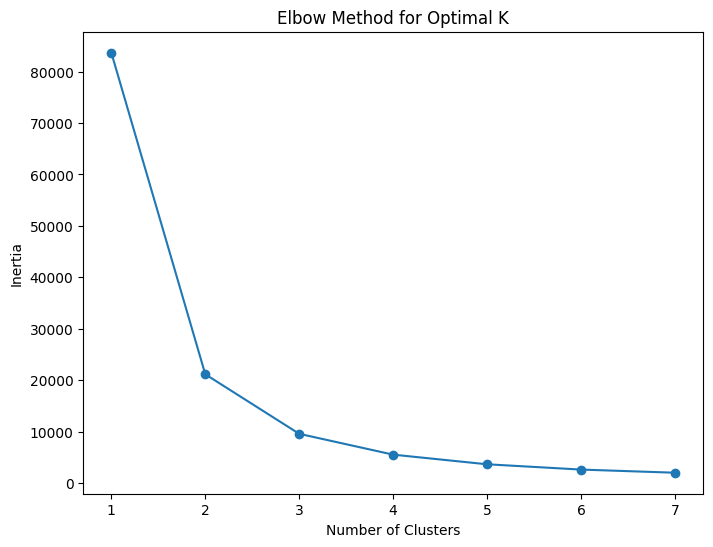

In [34]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

binary_arr = ['7', '8', '1_B', '1_C', '1_D', '1_E', '1_F', '1_H',
 '2_X', '2_R', '2_S', '2_A', '2_H', '2_K', '3_X', '3_O', '3_I', '3_C']

df.columns = df.columns.map(str)
df_polymodal = pd.get_dummies(df, columns=['1', '2', '3'])
df_polymodal.columns = df_polymodal.columns.map(str)
for binary in binary_arr:
    df_polymodal[binary] = df_polymodal[binary].astype('category')
    df_polymodal[binary] = df_polymodal[binary].cat.codes

inertia = []

for n_clusters in range(1, 8):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(df_polymodal)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 8), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [39]:
optimal_n_clusters = 3
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=0)
kmeans.fit(df_polymodal)
y_pred = kmeans.fit_predict(df_polymodal)

array = []

for index, row in df.iterrows():
    sum_row = row[11] + row[12] + row[13]
    if i < 2:
        array.append(0)
    elif i < 4:
        array.append(1)
    else: 
        array.append(2)

df_polymodal['gradeclass'] = array

d = {'Target': df_polymodal['gradeclass'], 'Prediction' : y_pred}


result = pd.DataFrame(d, columns = ['Target', 'Prediction'])

comparison = np.where(result['Target'] == result['Prediction'], True, False)
result['Comparison'] = comparison
result['Comparison'].value_counts(normalize = True).round(2)

c:\Users\Alena\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Alena\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Comparison
False    0.67
True     0.33
Name: proportion, dtype: float64

In [51]:
result = 0
max_sum = df[['11', '12', '13']].sum(axis=1).max()  
min_sum = df[['11', '12', '13']].sum(axis=1).min()  
avg = (max_sum - min_sum) / 2

for i in range(len(matrix_pairwise_distances_df)):
    nearest_obj_idx = np.argmin(np.delete(matrix_pairwise_distances_df[i], i))
    if nearest_obj_idx >= i:
        nearest_obj_idx += 1

    G3_i_value = df['11'].iloc[i] + df['12'].iloc[i] + df['13'].iloc[i]
    G3_nearest_obj_value = df['11'].iloc[nearest_obj_idx] + df['12'].iloc[nearest_obj_idx] + df['13'].iloc[nearest_obj_idx]

    if(G3_i_value < avg and G3_nearest_obj_value < avg): 
        result += 1

    elif(G3_i_value >= avg and G3_nearest_obj_value >= avg):
        result += 1

local_compactness_percentage = (result / len(matrix_pairwise_distances_df)) * 100
print(f"Процент локальной компактности: {local_compactness_percentage:.2f}%")

Процент локальной компактности: 98.00%


по моему мнениею если в 1 столбце принимает значение D, во втором K, то сумма 11-13 столбцов не 0

In [50]:
condition_true = (df['1'] == 'D') & (df['2'] == 'K') & (df['11'] + df['12'] + df['13'] != 0)
condition_false = (df['1'] == 'D') & (df['2'] == 'K') & (df['11'] + df['12'] + df['13'] == 0)

count_true = condition_true.sum()
count_false = condition_false.sum()

print(f'Процент правильных гипотез: {count_true / (count_true + count_false) * 100}%')


Процент правильных гипотез: 40.0%


потенциальная опревержимость

In [55]:
 df_bootstrap = df.copy()


n_iterations = 1000
results = []

for _ in range(n_iterations):
    bootstrap_sample = df_bootstrap.sample(frac=1, replace=True)
    
    father_guardian_students = bootstrap_sample[(bootstrap_sample['1'] == 'D') & (bootstrap_sample['2'] == 'K')]
    
    students_in_range = father_guardian_students[(father_guardian_students['11'] + father_guardian_students['12'] + father_guardian_students['13'] != 0)]
    percentage_in_range = (len(students_in_range) / len(father_guardian_students)) * 100
    
    results.append(percentage_in_range)

std_deviation = np.std(results)

print(f"Стандартное отклонение для percentage_in_range: {std_deviation:.2f}")

Стандартное отклонение для percentage_in_range: 16.35
